# DATAVIZ

Quelle est la différence entre MW et MWh ?

Elle correspond à l’énergie maximale qu’une installation électrique peut produire en 1 seconde tandis que le wattheure (Wh), le kWh et le MWh expriment la quantité d’énergie produite par l’installation pendant un temps défini (produit de la puissance par le temps en heure). Comparons les productions entre une installation éolienne de 1 MW et une installation photovoltaïque de même puissance, deux sources de production d’énergie intermittentes selon le vent ou l’ensoleillement. En 2012, le parc éolien français d’une puissance installée de 7449 MW a produit 14900000 MWh. Si l’on divise la production annuelle (14900000) par la puissance installée (7449), on obtient un nombre proche de 2000. Ce nombre équivaut au nombre d’heures pendant lesquelles les éoliennes auraient dû tourner à pleine puissance pour atteindre la production obtenue... à comparer aux 8760 heures contenues dans une année.

Il signifie également qu’1 MW éolien a permis de produire 2000 MWh au cours de l’année. Si l’on effectue le même calcul avec la production (4000000 MWh) et la puissance (3515 MW) photovoltaïques, on obtient 1138 heures. 1 MW photovoltaïque a permis de produire 1138 MWh au cours de l’année. Pour 1 MW installé, la production d’électricité n’est donc pas la même selon la source d’énergie.

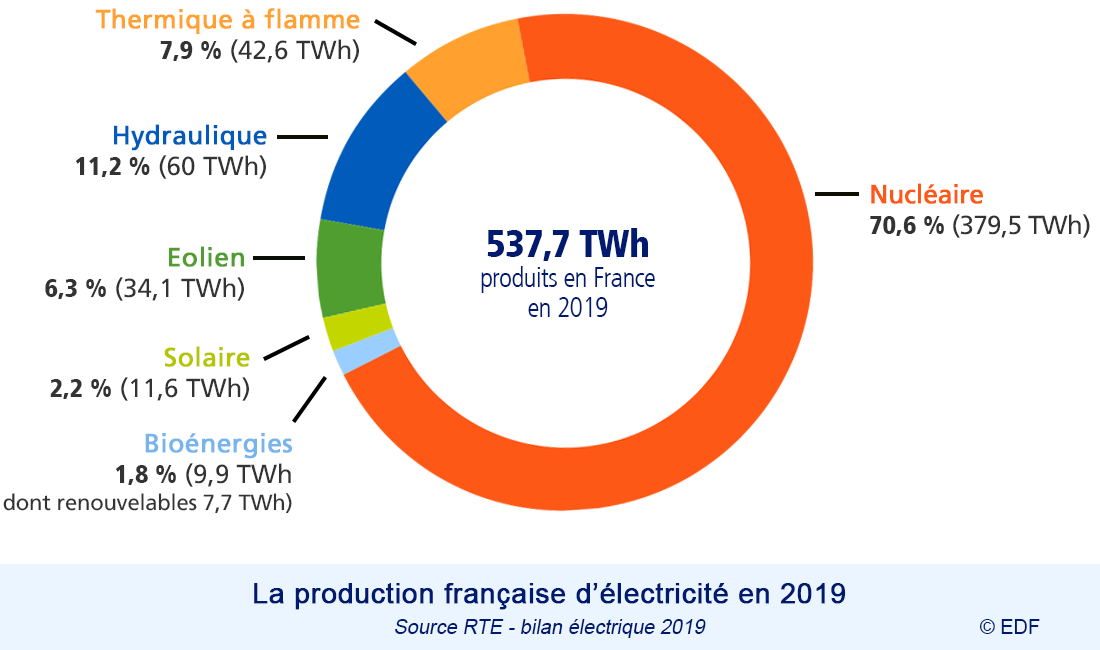

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import simps
from numpy import trapz
from sklearn.metrics import auc
%matplotlib inline

df=pd.read_csv('./dataset/ENERGIE.csv')

In [3]:
df.head()

,Unnamed: 0,index,Code INSEE région,Région,An,Mois,Jour,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
0,0,18,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,00:30,2013-01-01T00:30:00+01:00,8173.0,252.0,12069.0,257.0,0.0,3079.0,-4.0,68.0,-7551.0
1,1,35,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,01:00,2013-01-01T01:00:00+01:00,7944.0,252.0,11895.0,257.0,0.0,2828.0,-328.0,67.0,-7029.0
2,2,36,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,01:30,2013-01-01T01:30:00+01:00,7896.0,252.0,12228.0,247.0,0.0,2710.0,-327.0,65.0,-7282.0
3,3,57,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,02:00,2013-01-01T02:00:00+01:00,7882.0,251.0,12274.0,244.0,0.0,2516.0,-328.0,66.0,-7144.0
4,4,60,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,02:30,2013-01-01T02:30:00+01:00,7909.0,251.0,12228.0,245.0,0.0,2440.0,-406.0,67.0,-6920.0


In [4]:
df.shape

(1858164, 19)

In [5]:
# colonne Date convertir au datetime# 
df['Date']=pd.to_datetime(df['Date'])
df['Date - Heure'] = pd.to_datetime(df['Date - Heure'], utc=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858164 entries, 0 to 1858163
Data columns (total 19 columns):
 #   Column               Dtype              
---  ------               -----              
 0   Unnamed: 0           int64              
 1   index                int64              
 2   Code INSEE région    int64              
 3   Région               object             
 4   An                   int64              
 5   Mois                 int64              
 6   Jour                 int64              
 7   Date                 datetime64[ns]     
 8   Heure                object             
 9   Date - Heure         datetime64[ns, UTC]
 10  Consommation (MW)    float64            
 11  Thermique (MW)       float64            
 12  Nucléaire (MW)       float64            
 13  Eolien (MW)          float64            
 14  Solaire (MW)         float64            
 15  Hydraulique (MW)     float64            
 16  Pompage (MW)         float64            
 17  Bioénerg

In [7]:
df['Région'].unique()

array(['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne',
       'Centre-Val de Loire', 'Grand Est', 'Hauts-de-France', 'Normandie',
       'Nouvelle-Aquitaine', 'Occitanie', 'Pays de la Loire',
       "Provence-Alpes-Côte d'Azur", 'Île-de-France'], dtype=object)

In [8]:
OCC= df[(df['Région']=='Occitanie')]
NOR= df[(df['Région']=='Normandie')]
PACA= df[(df['Région']=="Provence-Alpes-Côte d'Azur")]

# VERIFICATION SUR LA METHODE DE BILAN ENERGETIQUE

In [9]:
OCC.head()

,Unnamed: 0,index,Code INSEE région,Région,An,Mois,Jour,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
1238776,1238776,17,76,Occitanie,2013,1,1,2013-01-01,00:30,2012-12-31 23:30:00+00:00,5228.0,78.0,2497.0,367.0,0.0,943.0,-13.0,81.0,1273.0
1238777,1238777,33,76,Occitanie,2013,1,1,2013-01-01,01:00,2013-01-01 00:00:00+00:00,4955.0,77.0,2451.0,330.0,0.0,785.0,-601.0,79.0,1830.0
1238778,1238778,41,76,Occitanie,2013,1,1,2013-01-01,01:30,2013-01-01 00:30:00+00:00,4888.0,78.0,1772.0,286.0,0.0,765.0,-648.0,78.0,2554.0
1238779,1238779,52,76,Occitanie,2013,1,1,2013-01-01,02:00,2013-01-01 01:00:00+00:00,4881.0,77.0,1549.0,236.0,0.0,744.0,-649.0,78.0,2841.0
1238780,1238780,68,76,Occitanie,2013,1,1,2013-01-01,02:30,2013-01-01 01:30:00+00:00,4768.0,77.0,1551.0,224.0,0.0,733.0,-649.0,78.0,2749.0


In [10]:
OCC.shape

(154847, 19)

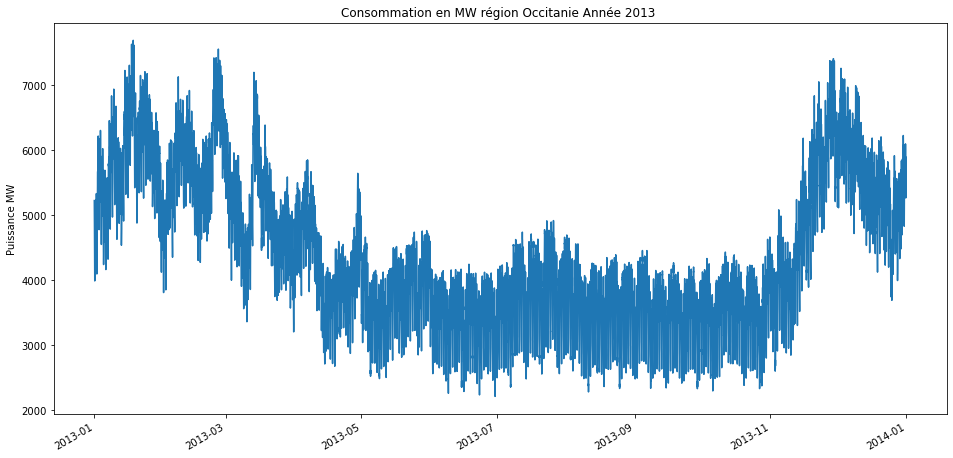

In [11]:
plt.figure(figsize=(16,8))
x=OCC[(OCC['An']==2013)]['Date - Heure']
y=OCC[(OCC['An']==2013)]['Consommation (MW)']
plt.plot(x, y, linestyle ='solid')
plt.ylabel('Puissance MW')
plt.gcf().autofmt_xdate()
plt.title('Consommation en MW région Occitanie Année 2013 ');

In [12]:
# Compute the area using the composite trapezoidal rule.
area = trapz(y, dx=1)
print("area =", area)

# Compute the area using the composite Simpson's rule.
area1 = simps(y, dx=1)
print("area =", area1)

area3=OCC[(OCC['An']==2013)]['Consommation (MW)'].sum()
print('area3=',area3)
# Erreur en % :

print(' différence entre intégration et somme des colonnes:' ,area1-area3)
print(' diff en %',(area1-area3)*100/area1)

area = 76031301.0
area = 76087600.0
area3= 76036803.0
 différence entre intégration et somme des colonnes: 50797.0
 diff en % 0.06676120681950803


In [13]:
PACA= df[(df['Région']=="Provence-Alpes-Côte d'Azur")]

In [14]:
PACA.head()

,Unnamed: 0,index,Code INSEE région,Région,An,Mois,Jour,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
1548470,1548470,21,93,Provence-Alpes-Côte d'Azur,2013,1,1,2013-01-01,00:30,2012-12-31 23:30:00+00:00,5570.0,537.0,0.0,12.0,0.0,1412.0,0.0,58.0,3548.0
1548471,1548471,30,93,Provence-Alpes-Côte d'Azur,2013,1,1,2013-01-01,01:00,2013-01-01 00:00:00+00:00,5698.0,315.0,0.0,14.0,0.0,1371.0,0.0,58.0,3938.0
1548472,1548472,45,93,Provence-Alpes-Côte d'Azur,2013,1,1,2013-01-01,01:30,2013-01-01 00:30:00+00:00,5680.0,316.0,0.0,18.0,0.0,1207.0,0.0,56.0,4083.0
1548473,1548473,58,93,Provence-Alpes-Côte d'Azur,2013,1,1,2013-01-01,02:00,2013-01-01 01:00:00+00:00,5577.0,316.0,0.0,20.0,0.0,1205.0,0.0,58.0,3976.0
1548474,1548474,70,93,Provence-Alpes-Côte d'Azur,2013,1,1,2013-01-01,02:30,2013-01-01 01:30:00+00:00,5711.0,316.0,0.0,24.0,0.0,1147.0,0.0,59.0,4163.0


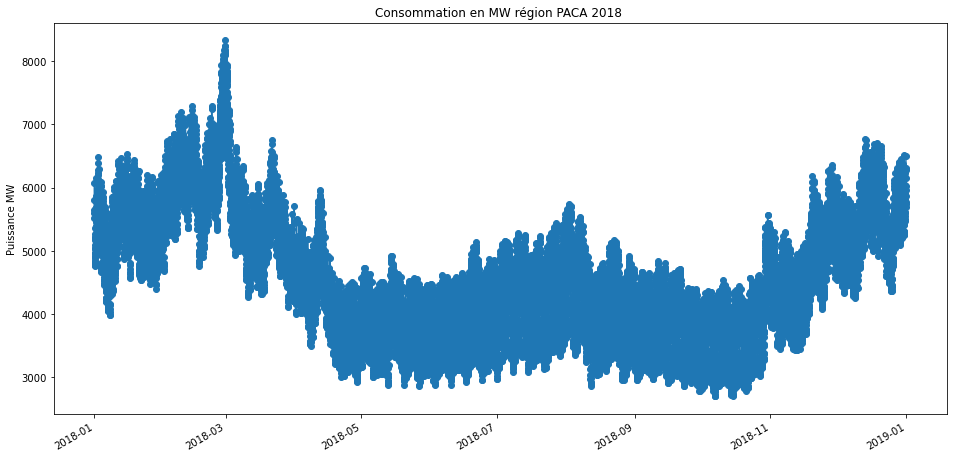

In [15]:
plt.figure(figsize=(16,8))
x1=PACA[(PACA['An']==2018)]['Date - Heure']
y1=PACA[(PACA['An']==2018)]['Consommation (MW)']
plt.plot_date(x1, y1, linestyle ='solid')
plt.ylabel('Puissance MW')
plt.gcf().autofmt_xdate()
plt.title('Consommation en MW région PACA 2018 ');

In [16]:
# Compute the area using the composite trapezoidal rule.
area = trapz(y1, dx=1)
print("area =", area)

# Compute the area using the composite Simpson's rule.
area1 = simps(y1, dx=1)
print("area =", area1)

area3=PACA[(PACA['An']==2018)]['Consommation (MW)'].sum()
print('area3=',area3)
# Erreur en % :

print(' différence entre intégration et somme des colonnes:' ,area1-area3)
print(' diff en %',(area1-area3)*100/area1)

area = 80878136.5
area = 80878069.33333333
area3= 80884421.0
 différence entre intégration et somme des colonnes: -6351.666666671634
 diff en % -0.007853385619893672


In [17]:
NOR= df[(df['Région']=='Normandie')]

In [18]:
NOR[NOR['An']==2016]

,Unnamed: 0,index,Code INSEE région,Région,An,Mois,Jour,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
981641,981641,630726,28,Normandie,2016,1,1,2016-01-01,00:00,2015-12-31 23:00:00+00:00,3582.0,325.0,6452.0,143.0,0.0,14.0,0.0,55.0,-3405.0
981642,981642,630738,28,Normandie,2016,1,1,2016-01-01,00:30,2015-12-31 23:30:00+00:00,3551.0,331.0,6453.0,132.0,0.0,14.0,0.0,54.0,-3433.0
981643,981643,630744,28,Normandie,2016,1,1,2016-01-01,01:00,2016-01-01 00:00:00+00:00,3456.0,331.0,6419.0,118.0,0.0,14.0,0.0,55.0,-3480.0
981644,981644,630757,28,Normandie,2016,1,1,2016-01-01,01:30,2016-01-01 00:30:00+00:00,3466.0,339.0,6411.0,84.0,0.0,14.0,0.0,55.0,-3437.0
981645,981645,630773,28,Normandie,2016,1,1,2016-01-01,02:00,2016-01-01 01:00:00+00:00,3461.0,332.0,6418.0,80.0,0.0,14.0,0.0,55.0,-3438.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999204,999204,841479,28,Normandie,2016,12,31,2016-12-31,21:30,2016-12-31 20:30:00+00:00,4728.0,795.0,9076.0,40.0,0.0,14.0,0.0,52.0,-5249.0
999205,999205,841492,28,Normandie,2016,12,31,2016-12-31,22:00,2016-12-31 21:00:00+00:00,4716.0,785.0,9073.0,47.0,0.0,14.0,0.0,52.0,-5255.0
999206,999206,841504,28,Normandie,2016,12,31,2016-12-31,22:30,2016-12-31 21:30:00+00:00,4892.0,729.0,9074.0,49.0,0.0,14.0,0.0,53.0,-5028.0
999207,999207,841522,28,Normandie,2016,12,31,2016-12-31,23:00,2016-12-31 22:00:00+00:00,5059.0,795.0,9073.0,52.0,0.0,15.0,0.0,51.0,-4927.0


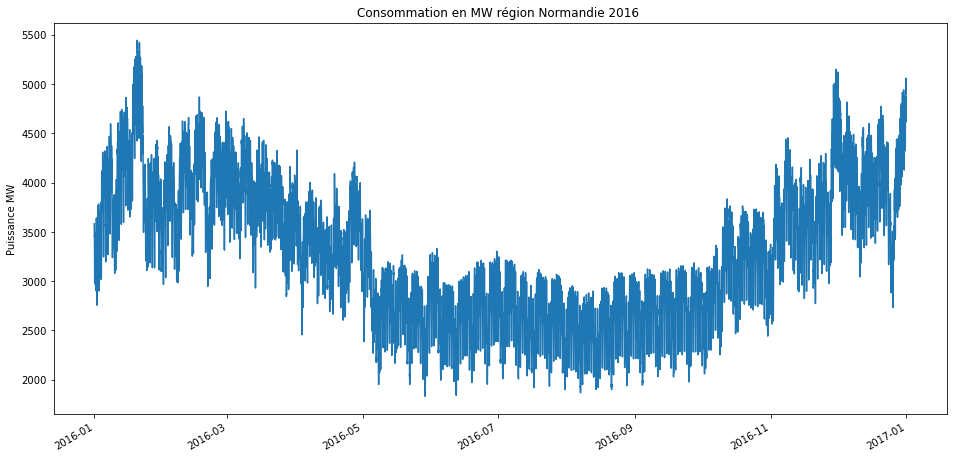

In [19]:
plt.figure(figsize=(16,8))
x2=NOR[(NOR['An']==2016)]['Date - Heure']
y2=NOR[(NOR['An']==2016)]['Consommation (MW)']
plt.plot(x2, y2, linestyle ='solid')
plt.ylabel('Puissance MW')
plt.gcf().autofmt_xdate()
plt.title('Consommation en MW région Normandie 2016 ');

In [20]:
# Compute the area using the composite trapezoidal rule.
area = trapz(y2, dx=1)
print("area =", area)

# Compute the area using the composite Simpson's rule.
area1 = simps(y2, dx=1)
print("area =", area1)

area3=NOR[(NOR['An']==2016)]['Consommation (MW)'].sum()
print('area3=',area3)
# Erreur en % :

print(' différence entre intégration et somme des colonnes:' ,area1-area3)
print(' diff en %',(area1-area3)*100/area1)

area = 57206848.0
area = 57206858.66666667
area3= 57211089.0
 différence entre intégration et somme des colonnes: -4230.333333328366
 diff en % -0.007394800959055805


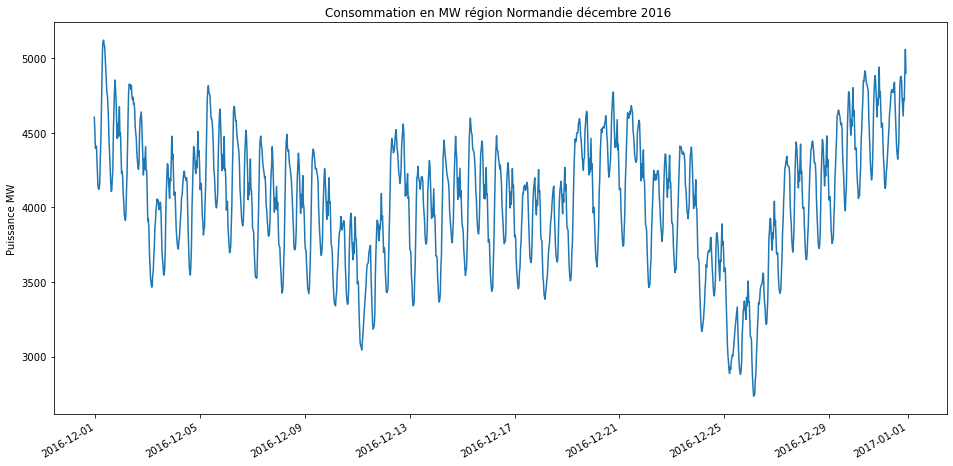

In [21]:
plt.figure(figsize=(16,8))
x3=NOR[(NOR['An']==2016)& (NOR['Mois']==12)]['Date - Heure']
y3=NOR[(NOR['An']==2016)& (NOR['Mois']==12)]['Consommation (MW)']
plt.plot(x3, y3, linestyle ='solid')
plt.ylabel('Puissance MW')
plt.gcf().autofmt_xdate()
plt.title('Consommation en MW région Normandie décembre 2016 ');

In [22]:
# Compute the area using the composite trapezoidal rule.
area = trapz(y3, dx=1)
print("area =", area)

# Compute the area using the composite Simpson's rule.
area1 = simps(y3, dx=1)
print("area =", area1)

area3=NOR[(NOR['An']==2016)& (NOR['Mois']==12)]['Consommation (MW)'].sum()
print('area3=',area3)
# Erreur en % :

print(' différence entre intégration et somme des colonnes:' ,area1-area3)
print(' diff en %',(area1-area3)*100/area1)

area = 6008604.0
area = 6008610.166666666
area3= 6013356.0
 différence entre intégration et somme des colonnes: -4745.833333333954
 diff en % -0.07898387816307195


# Nous pouvons valider que le résultat est identique selon que l'on intègre l'aire sous la courbe ou que nous opérons la somme des puissances , car en fait les mesures étant toutes les 1/2 heures, la décomposition est précise

In [23]:
data = df.groupby(['An','Mois']).sum().reset_index()


In [24]:
data.head(24)


,An,Mois,Unnamed: 0,index,Code INSEE région,Jour,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
0,2013,1,15210252366,159409374,890713,285684,106515355.0,12575951.0,84708335.0,2627826.0,275544.0,13618137.0,-1204944.0,1089974.0,-7229744.0
1,2013,2,13770360576,418029696,805056,233856,98659091.0,12699120.0,73478789.0,2911326.0,441789.0,13528331.0,-945548.0,981454.0,-4486185.0
2,2013,3,15271040448,766227744,891312,285696,98492373.0,12589251.0,73628178.0,2689621.0,666161.0,12713769.0,-1200411.0,1067519.0,-3721243.0
3,2013,4,14803724160,1045085760,862560,267840,80269032.0,6082453.0,62938389.0,2963937.0,839159.0,14237985.0,-1085516.0,846559.0,-6611003.0
4,2013,5,15323322816,1393616160,891312,285696,73323639.0,2904908.0,62265278.0,2290765.0,972577.0,17002185.0,-1349586.0,979575.0,-11796422.0
5,2013,6,14854320000,1652235840,862560,267840,65655313.0,2303224.0,57162011.0,2306845.0,1090533.0,14614602.0,-1231739.0,925811.0,-11568738.0
6,2013,7,15375605184,2021004576,891312,285696,69091979.0,3206167.0,61327650.0,1739138.0,1279037.0,12734113.0,-1105716.0,1058725.0,-11201942.0
7,2013,8,15402174912,2339841312,891312,285696,62765320.0,4006616.0,59755485.0,1460077.0,1168245.0,9036032.0,-1232038.0,1073020.0,-12554856.0
8,2013,9,14930628480,2567937600,862560,267840,66050687.0,5546161.0,59460032.0,1879024.0,894787.0,8195811.0,-1067940.0,957490.0,-9863288.0
9,2013,10,15454457280,2967229728,891312,285696,73631639.0,6530483.0,62084030.0,3196188.0,617819.0,9646678.0,-1214383.0,993805.0,-8275657.0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   An                   106 non-null    int64  
 1   Mois                 106 non-null    int64  
 2   Unnamed: 0           106 non-null    int64  
 3   index                106 non-null    int64  
 4   Code INSEE région    106 non-null    int64  
 5   Jour                 106 non-null    int64  
 6   Consommation (MW)    106 non-null    float64
 7   Thermique (MW)       106 non-null    float64
 8   Nucléaire (MW)       106 non-null    float64
 9   Eolien (MW)          106 non-null    float64
 10  Solaire (MW)         106 non-null    float64
 11  Hydraulique (MW)     106 non-null    float64
 12  Pompage (MW)         106 non-null    float64
 13  Bioénergies (MW)     106 non-null    float64
 14  Ech. physiques (MW)  106 non-null    float64
dtypes: float64(9), int64(6)
memory usage: 12

# PRODUCTIONS / CONSO

* PRODUCTION NATIONALE ANNUELLE

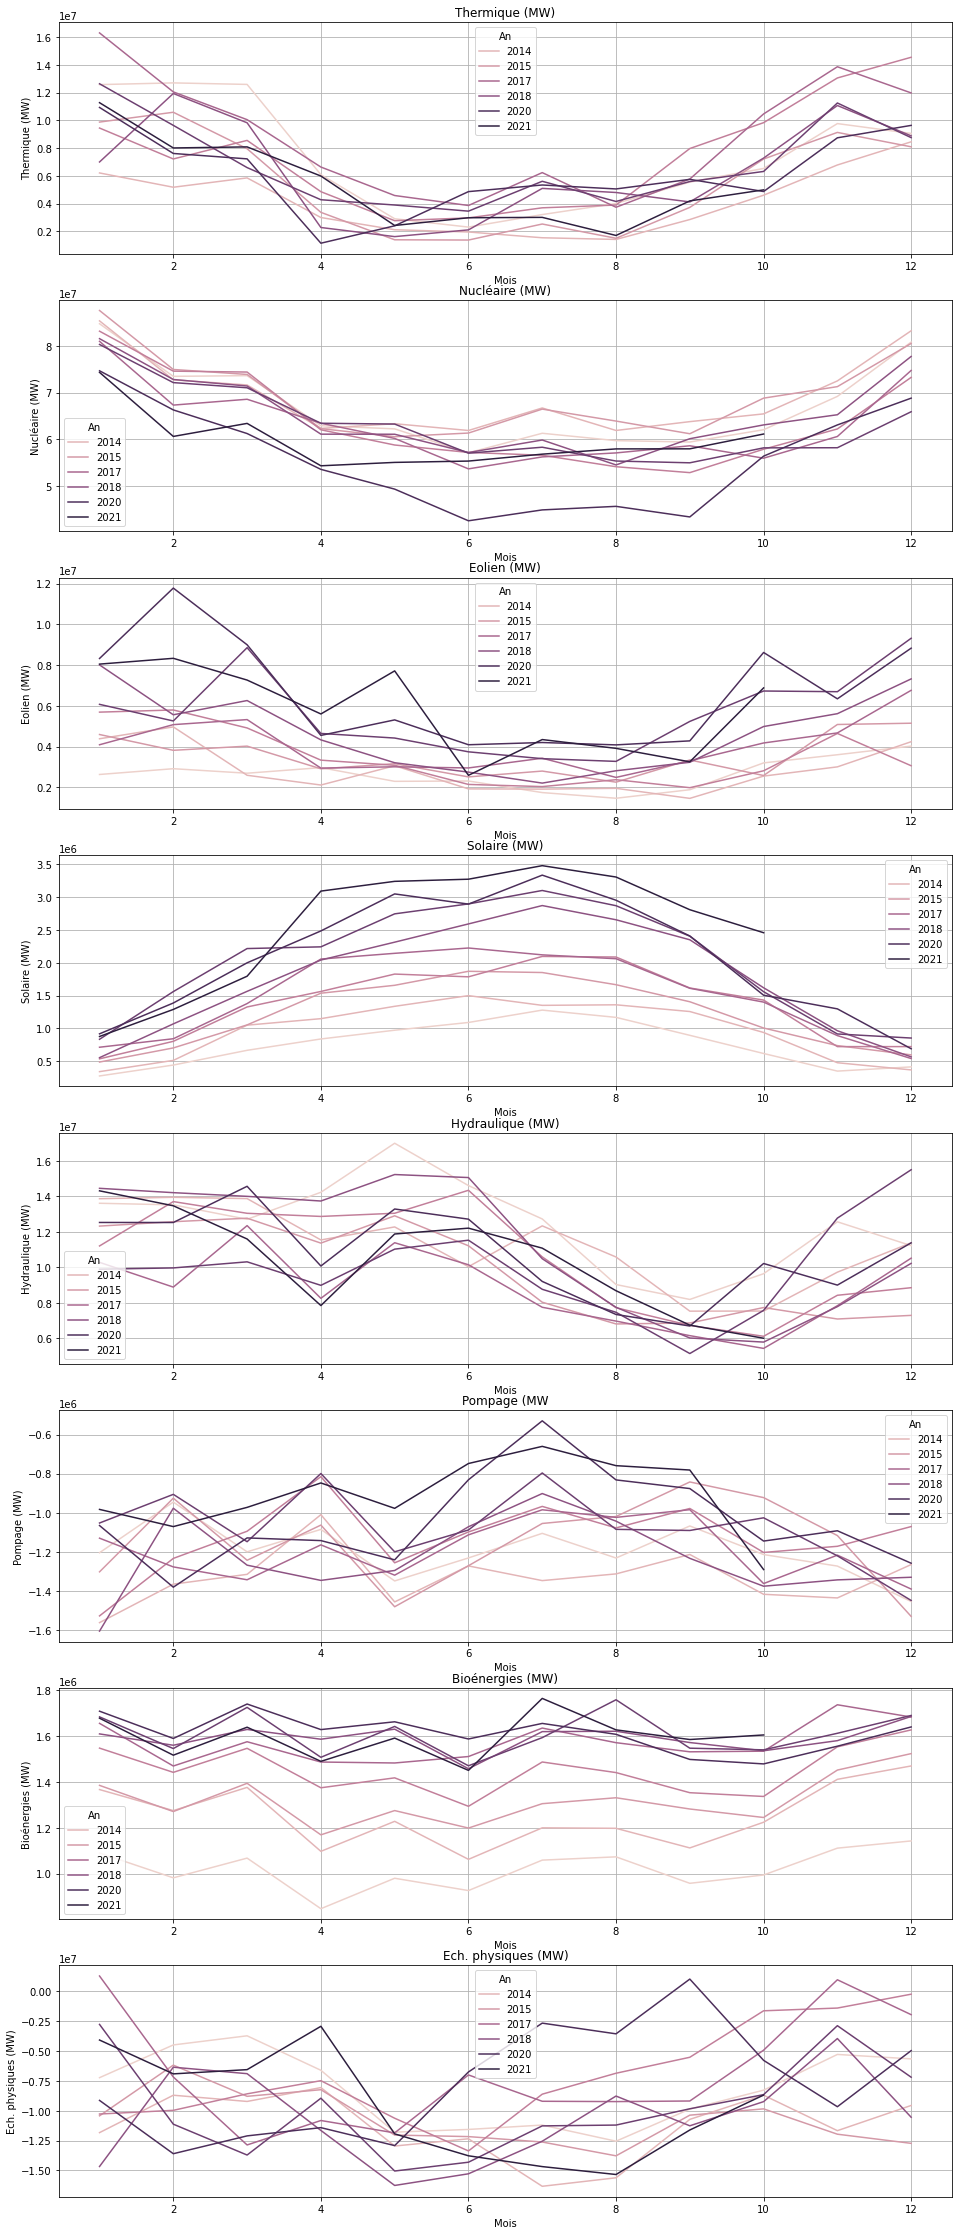

In [26]:
fig1, graf1 = plt.subplots(8,1, figsize=(16, 40))

graf1[0].set_title('Thermique (MW)')
graf1[1].set_title('Nucléaire (MW)')
graf1[2].set_title('Eolien (MW)')
graf1[3].set_title('Solaire (MW)')
graf1[4].set_title('Hydraulique (MW)')
graf1[5].set_title('Pompage (MW')
graf1[6].set_title('Bioénergies (MW)')
graf1[7].set_title('Ech. physiques (MW)')

graf1[0].grid()
graf1[1].grid()
graf1[2].grid()
graf1[3].grid()
graf1[4].grid()
graf1[5].grid()
graf1[6].grid()
graf1[7].grid()

sns.lineplot(data=data, x='Mois', y='Thermique (MW)', hue='An' , ax=graf1[0])
sns.lineplot(data=data, x='Mois', y='Nucléaire (MW)', hue='An', ax=graf1[1])
sns.lineplot(data=data, x='Mois', y='Eolien (MW)', hue='An', ax=graf1[2])
sns.lineplot(data=data, x='Mois', y='Solaire (MW)', hue='An', ax=graf1[3])
sns.lineplot(data=data, x='Mois', y='Hydraulique (MW)', hue='An', ax=graf1[4])
sns.lineplot(data=data, x='Mois', y='Pompage (MW)', hue='An', ax=graf1[5])
sns.lineplot(data=data, x='Mois', y='Bioénergies (MW)', hue='An', ax=graf1[6])
sns.lineplot(data=data, x='Mois', y='Ech. physiques (MW)', hue='An', ax=graf1[7]);



* CONSO NATIONALE ANNUELLES

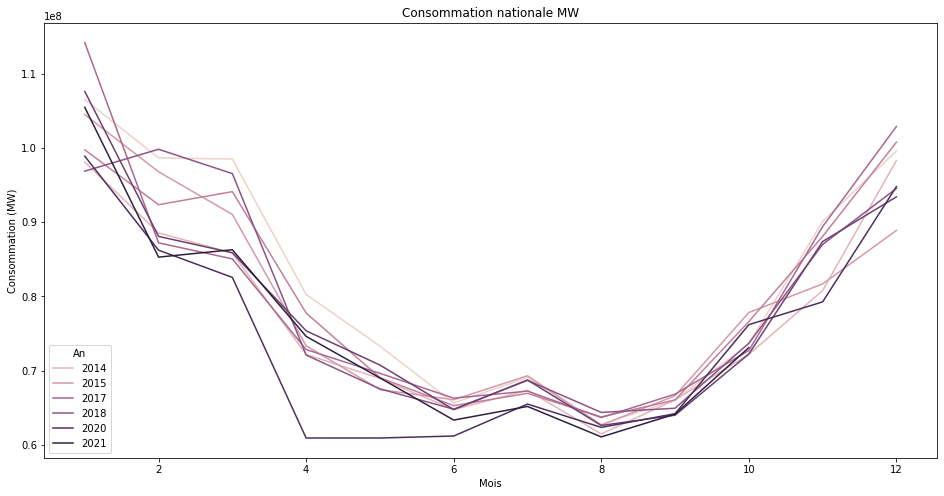

In [27]:
plt.figure (figsize=(16,8))
plt.title('Consommation nationale MW')
sns.lineplot(data=data, x='Mois', y='Consommation (MW)', hue='An');


# VERIFICATION BILAN ENERGIE

In [28]:
Prod_an = df.groupby(['An']).sum().reset_index()

In [29]:
Prod_an.head(10)

,An,Unnamed: 0,index,Code INSEE région,Mois,Jour,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
0,2013,180883850190,22100323614,10493881,1372020,3305076,984134263.0,87265040.0,806802087.0,31683576.0,9008891.0,149129252.0,-14366288.0,12227527.0,-98246706.0
1,2014,184577474880,66301181280,10494480,1372032,3305088,924697156.0,49924365.0,831008785.0,34116918.0,11639659.0,134720263.0,-15980203.0,15020879.0,-135740875.0
2,2015,188260879680,110502038880,10494480,1372032,3305088,946305720.0,66714884.0,832908808.0,42188171.0,14572733.0,117039522.0,-13776932.0,15832717.0,-129170409.0
3,2016,192475218816,155187455040,10523232,1373184,3321792,960630996.0,88787737.0,767408645.0,41835426.0,16521789.0,126717599.0,-13498506.0,17423013.0,-84558615.0
4,2017,195637780800,199024852320,10494480,1372032,3305088,958089446.0,105507116.0,757772631.0,48194982.0,17987913.0,106026436.0,-14314962.0,18877342.0,-81957709.0
5,2018,199321185600,243225709920,10494480,1372032,3305088,951041999.0,75986264.0,785967028.0,56261568.0,21166093.0,134815101.0,-14797445.0,19092161.0,-127454269.0
6,2019,203004590400,287426567520,10494480,1372032,3305088,940954352.0,82152897.0,758459526.0,67631922.0,24204370.0,119002296.0,-12864508.0,19321315.0,-116957587.0
7,2020,207259323264,332596708416,10523232,1373184,3321792,893165536.0,73543103.0,670460374.0,79400565.0,24925055.0,129611835.0,-12525881.0,19357548.0,-91529600.0
8,2021,174965492736,310043257344,8740608,967680,2751552,747653947.0,52634260.0,597336197.0,57927449.0,25624040.0,103882249.0,-9091256.0,15950793.0,-96516905.0


# Production nucléaire 2019 = 379,5 TW/h soit 379500000 MW/h

In [30]:
#Vérification des bilans enegétiques
# En MW 
prod_nuc_2019=758459526.0 
# En MW/h
print(prod_nuc_2019*0.5)

379229763.0


# Distibution des productions electriques

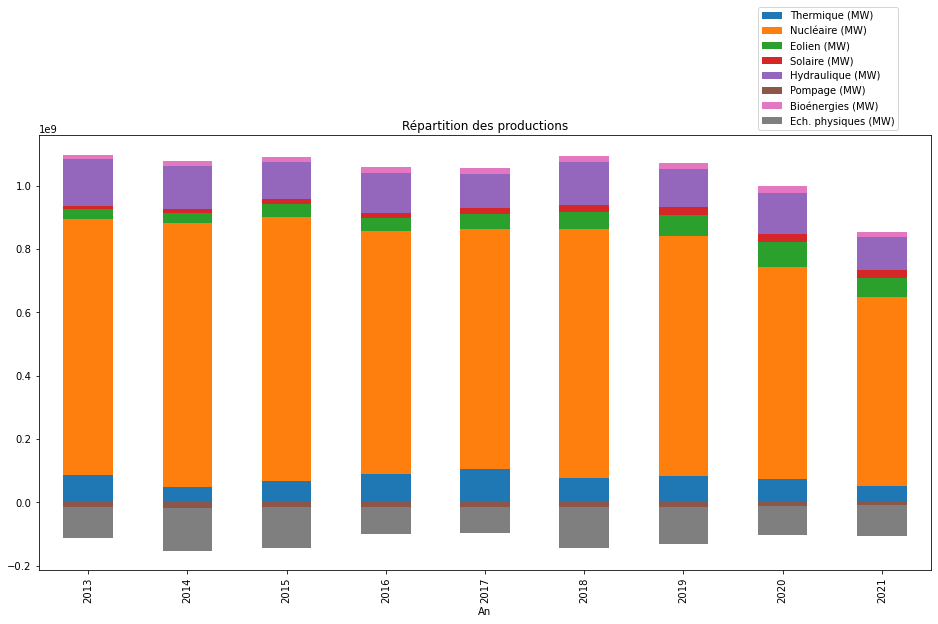

In [31]:


Prod_an.plot.bar(x = 'An', y=['Thermique (MW)','Nucléaire (MW)','Eolien (MW)','Solaire (MW)',
                             'Hydraulique (MW)','Pompage (MW)','Bioénergies (MW)','Ech. physiques (MW)'],
                             stacked=True, figsize=(16,8))
plt.title('Répartition des productions')
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0));

In [32]:
export = df.groupby(['Région','An']).sum().reset_index()

In [33]:
export.head()

,Région,An,Unnamed: 0,index,Code INSEE région,Mois,Jour,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
0,Auvergne-Rhône-Alpes,2013,153448921,1841688516,1471596,114335,275423,135207267.0,2598099.0,177772378.0,1471095.0,936885.0,65735742.0,-7372249.0,1121626.0,-107105770.0
1,Auvergne-Rhône-Alpes,2014,460399320,5525092181,1471680,114336,275424,128216120.0,2169851.0,175667421.0,1528810.0,1272295.0,57554947.0,-8409929.0,1604051.0,-103170890.0
2,Auvergne-Rhône-Alpes,2015,767349720,9208506498,1471680,114336,275424,133554478.0,4103074.0,181653691.0,1599086.0,1568734.0,52401309.0,-7497719.0,1692016.0,-101965625.0
3,Auvergne-Rhône-Alpes,2016,1077665040,12932280223,1475712,114432,276816,135093077.0,5241665.0,149861321.0,1715615.0,1642502.0,56561696.0,-7715569.0,1941831.0,-74156270.0
4,Auvergne-Rhône-Alpes,2017,1382091480,16585404725,1471680,114336,275424,135393636.0,4905701.0,159892036.0,2016423.0,1776231.0,46647866.0,-7697286.0,1877185.0,-74024525.0


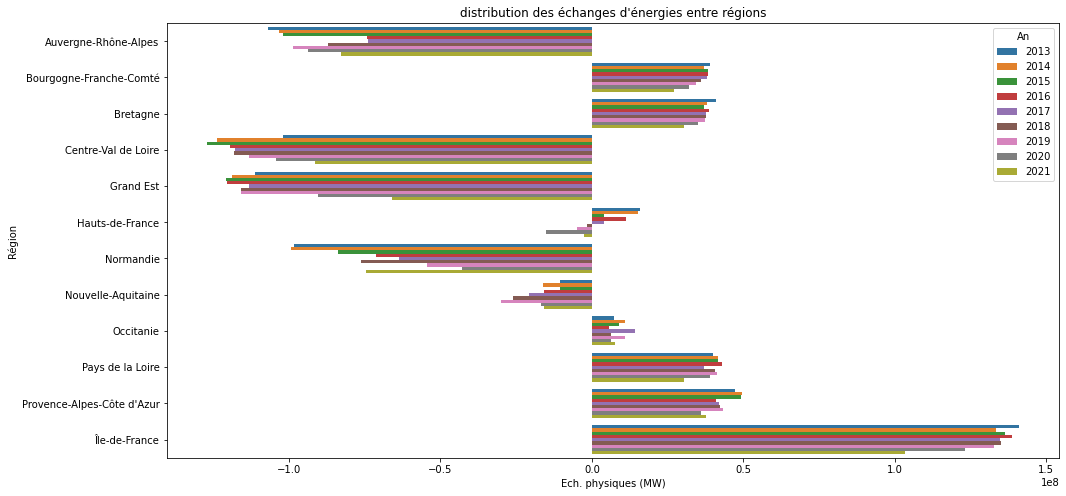

In [34]:
plt.figure (figsize=(16,8))
plt.title("distribution des échanges d'énergies entre régions")
sns.barplot(x="Ech. physiques (MW)", y="Région", hue='An', data=export);

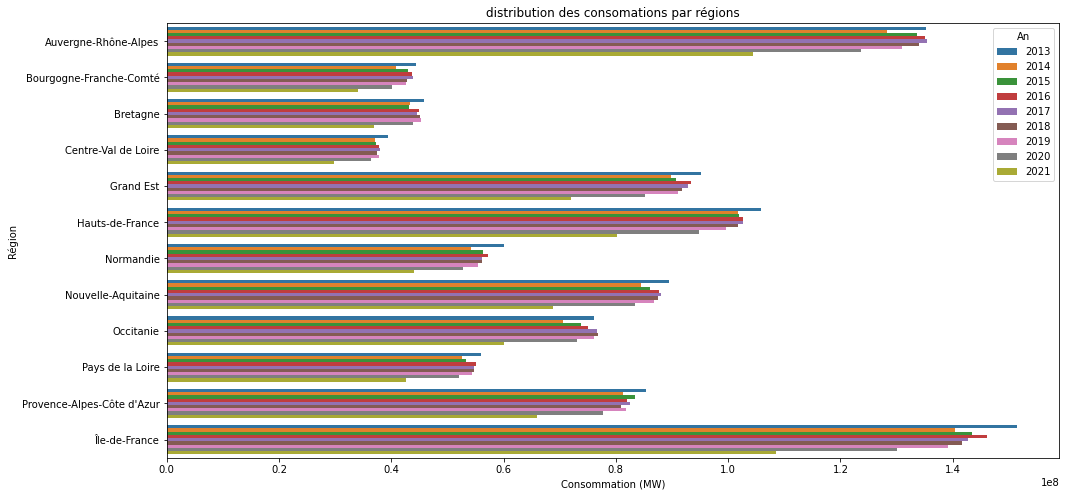

In [35]:
plt.figure (figsize=(16,8))
plt.title("distribution des consomations par régions")
sns.barplot(x="Consommation (MW)", y="Région", hue='An', data=export);

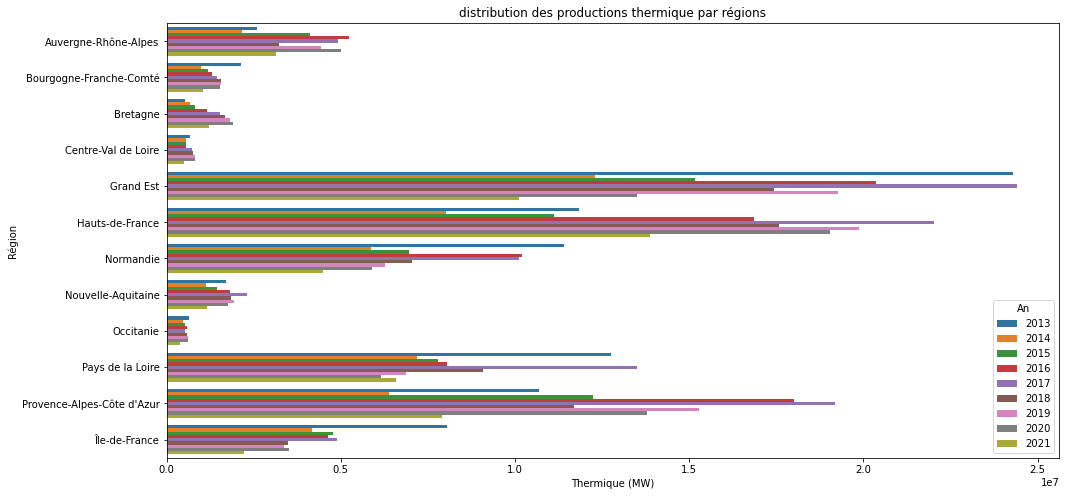

In [36]:
plt.figure (figsize=(16,8))
plt.title("distribution des productions thermique par régions")
sns.barplot(x="Thermique (MW)", y="Région", hue='An', data=export);

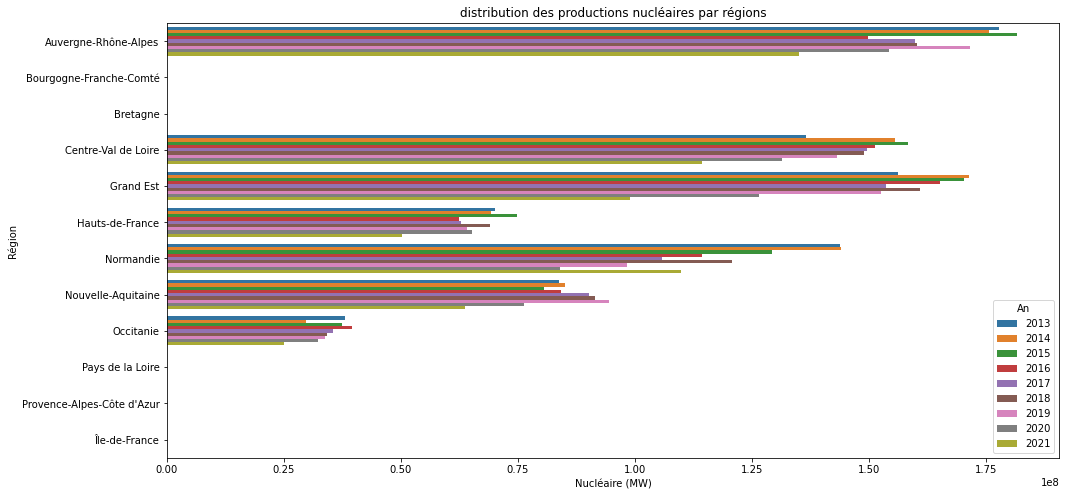

In [37]:
plt.figure (figsize=(16,8))
plt.title("distribution des productions nucléaires par régions")
sns.barplot(x="Nucléaire (MW)", y="Région", hue='An', data=export);

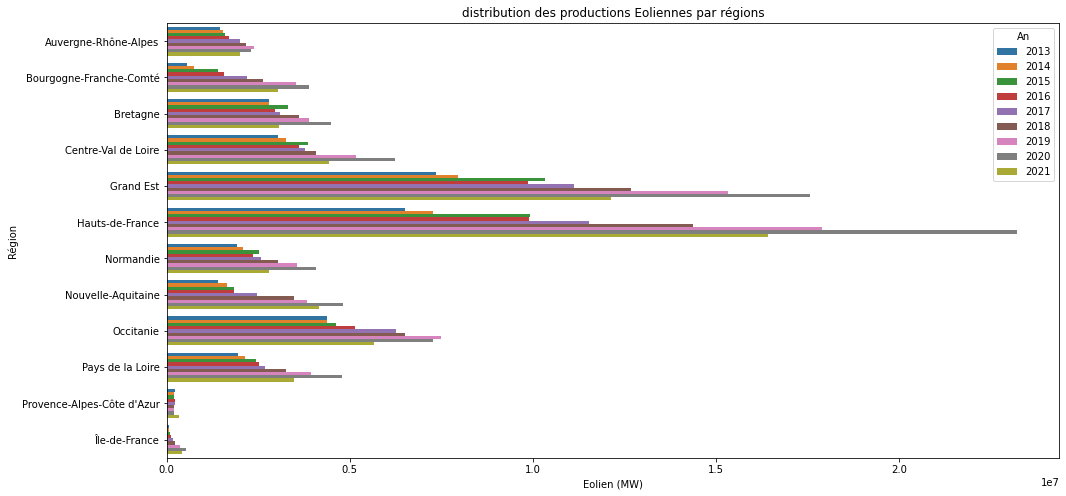

In [38]:
plt.figure (figsize=(16,8))
plt.title("distribution des productions Eoliennes par régions")
sns.barplot(x="Eolien (MW)", y="Région", hue='An', data=export);

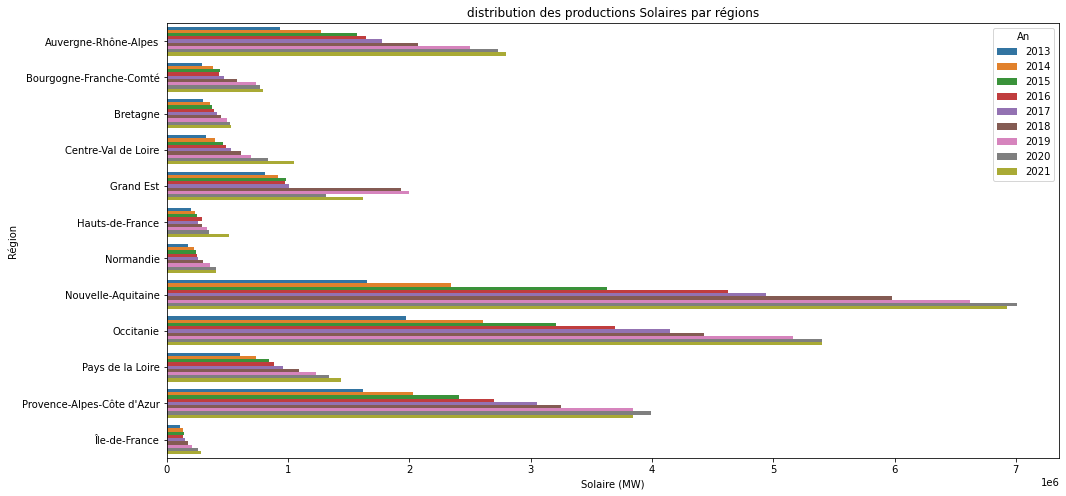

In [39]:
plt.figure (figsize=(16,8))
plt.title("distribution des productions Solaires par régions")
sns.barplot(x="Solaire (MW)", y="Région", hue='An', data=export);

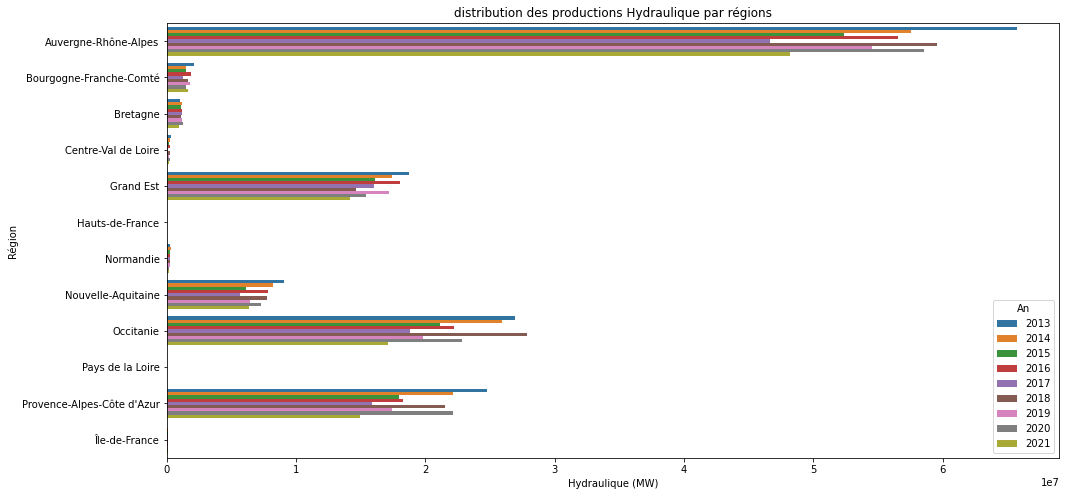

In [40]:
plt.figure (figsize=(16,8))
plt.title("distribution des productions Hydraulique par régions")
sns.barplot(x="Hydraulique (MW)", y="Région", hue='An', data=export);

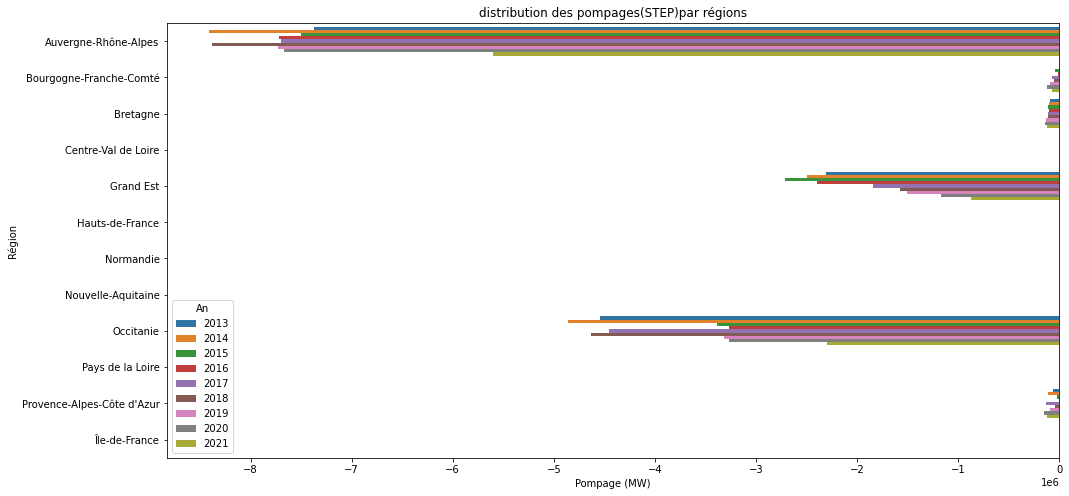

In [41]:
plt.figure (figsize=(16,8))
plt.title("distribution des pompages(STEP)par régions")
sns.barplot(x="Pompage (MW)", y="Région", hue='An', data=export);

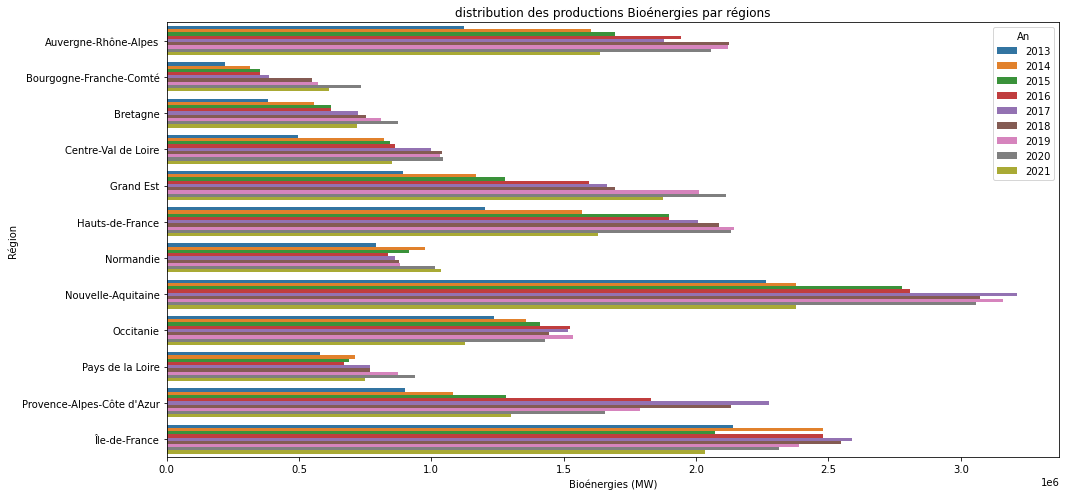

In [42]:
plt.figure (figsize=(16,8))
plt.title("distribution des productions Bioénergies par régions")
sns.barplot(x="Bioénergies (MW)", y="Région", hue='An', data=export);

# Distribution des consommations par régions

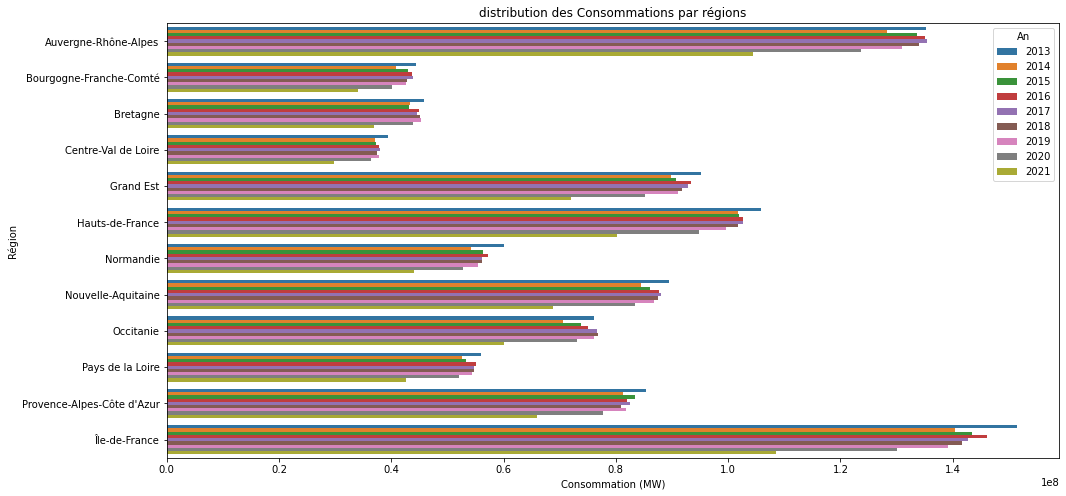

In [43]:
plt.figure (figsize=(16,8))
plt.title("distribution des Consommations par régions")
sns.barplot(x="Consommation (MW)", y="Région", hue='An', data=export);

# HEATMAP

In [44]:
df.head()

,Unnamed: 0,index,Code INSEE région,Région,An,Mois,Jour,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
0,0,18,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,00:30,2012-12-31 23:30:00+00:00,8173.0,252.0,12069.0,257.0,0.0,3079.0,-4.0,68.0,-7551.0
1,1,35,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,01:00,2013-01-01 00:00:00+00:00,7944.0,252.0,11895.0,257.0,0.0,2828.0,-328.0,67.0,-7029.0
2,2,36,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,01:30,2013-01-01 00:30:00+00:00,7896.0,252.0,12228.0,247.0,0.0,2710.0,-327.0,65.0,-7282.0
3,3,57,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,02:00,2013-01-01 01:00:00+00:00,7882.0,251.0,12274.0,244.0,0.0,2516.0,-328.0,66.0,-7144.0
4,4,60,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,02:30,2013-01-01 01:30:00+00:00,7909.0,251.0,12228.0,245.0,0.0,2440.0,-406.0,67.0,-6920.0


In [45]:
df=df.drop(['Région'], axis=1)

In [46]:
df.head()

,Unnamed: 0,index,Code INSEE région,An,Mois,Jour,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
0,0,18,84,2013,1,1,2013-01-01,00:30,2012-12-31 23:30:00+00:00,8173.0,252.0,12069.0,257.0,0.0,3079.0,-4.0,68.0,-7551.0
1,1,35,84,2013,1,1,2013-01-01,01:00,2013-01-01 00:00:00+00:00,7944.0,252.0,11895.0,257.0,0.0,2828.0,-328.0,67.0,-7029.0
2,2,36,84,2013,1,1,2013-01-01,01:30,2013-01-01 00:30:00+00:00,7896.0,252.0,12228.0,247.0,0.0,2710.0,-327.0,65.0,-7282.0
3,3,57,84,2013,1,1,2013-01-01,02:00,2013-01-01 01:00:00+00:00,7882.0,251.0,12274.0,244.0,0.0,2516.0,-328.0,66.0,-7144.0
4,4,60,84,2013,1,1,2013-01-01,02:30,2013-01-01 01:30:00+00:00,7909.0,251.0,12228.0,245.0,0.0,2440.0,-406.0,67.0,-6920.0


In [47]:
heat=df.drop(['Date','Heure','Date - Heure','index'], axis=1)

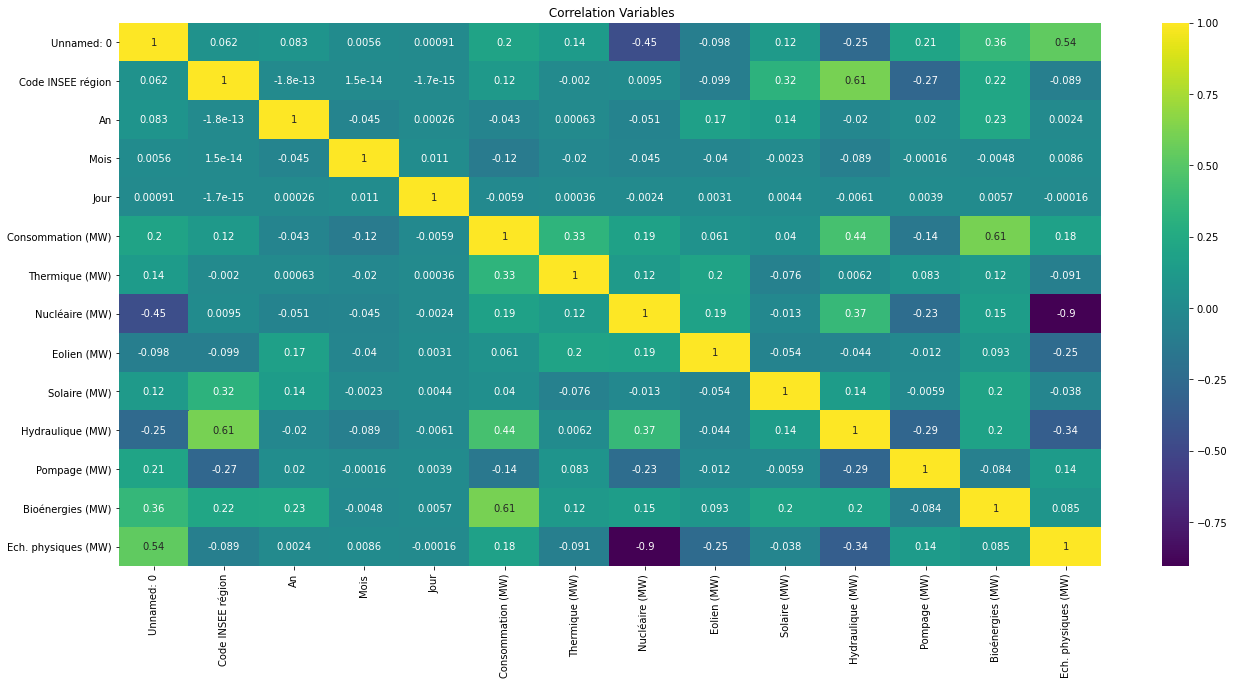

In [48]:
plt.figure(figsize=(22,10))
heat_corr = heat.corr()
sns.heatmap(heat_corr, annot=True, cmap='viridis')
plt.title(' Correlation Variables');

* Forte corrélation entre:

La production nucléaire et les échanges physiques

* Corrélation entre:

La consommation et la production de bioénergies
Le pompage et la production nucléaire
La consommation et la production thermique



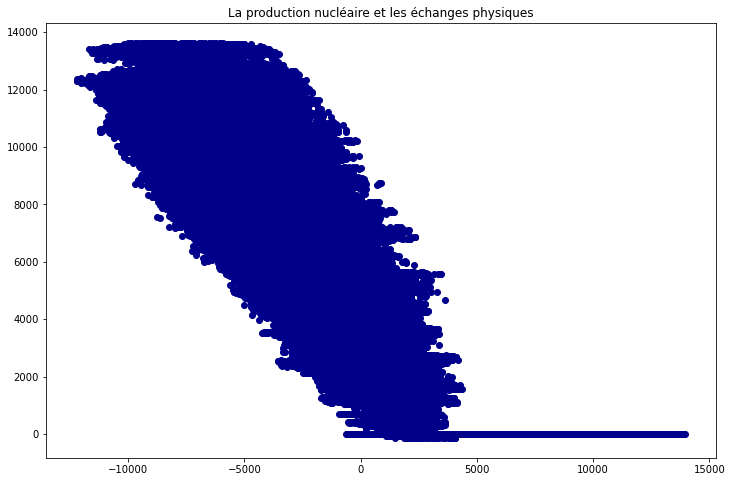

In [49]:
plt.figure(figsize=(12, 8))
plt.scatter( heat['Ech. physiques (MW)'] ,heat['Nucléaire (MW)'], color='darkblue')
plt.title( 'La production nucléaire et les échanges physiques');

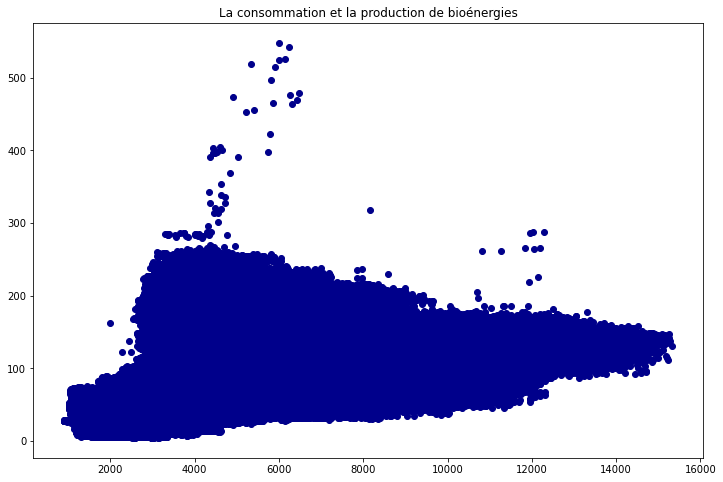

In [50]:
plt.figure(figsize=(12, 8))
plt.scatter( heat['Consommation (MW)'] ,heat['Bioénergies (MW)'], color='darkblue')
plt.title( 'La consommation et la production de bioénergies');

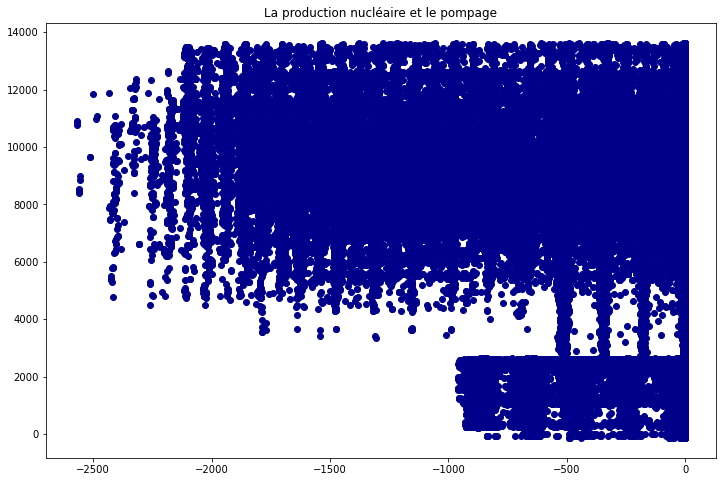

In [51]:
plt.figure(figsize=(12, 8))
plt.scatter( heat['Pompage (MW)'] ,heat['Nucléaire (MW)'], color='darkblue')
plt.title( 'La production nucléaire et le pompage');

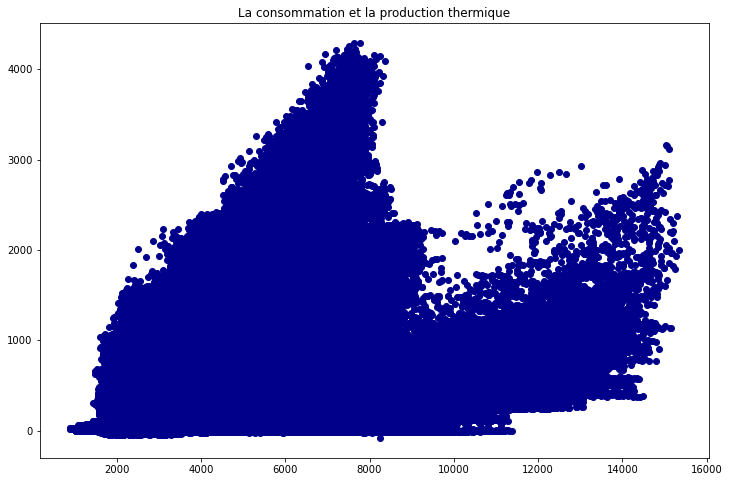

In [52]:
plt.figure(figsize=(12, 8))
plt.scatter( heat['Consommation (MW)'] ,heat['Thermique (MW)'], color='darkblue')
plt.title( 'La consommation et la production thermique');